In [11]:
import pandas as pd
import numpy as np
import matplotlib as mlt
from matplotlib import pyplot as plt
%matplotlib inline
mlt.rcParams["figure.figsize"]=(10,6)

In [5]:
df=pd.read_csv("heights2.csv")
df.sample(5)

,gender,height
8296,Female,66.124496
8195,Female,66.749167
5998,Female,68.040143
736,Male,67.086781
1721,Male,71.196587


In [6]:
df.shape

(10000, 2)

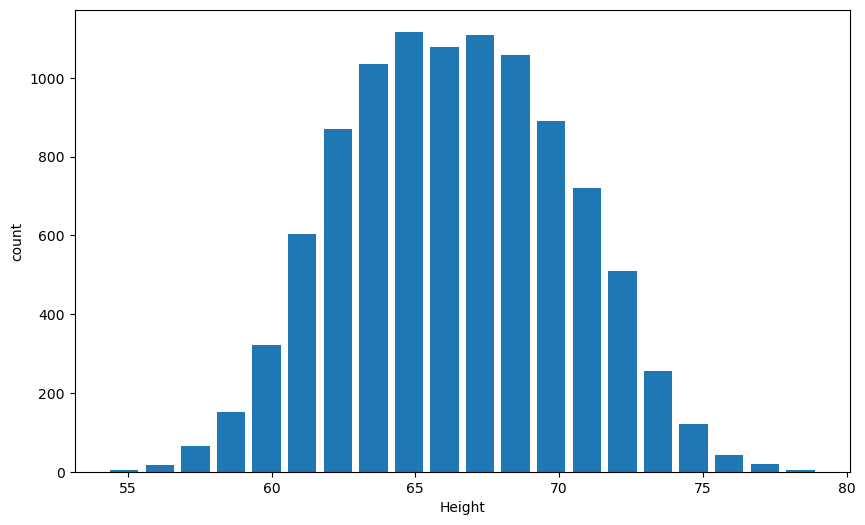

In [9]:
plt.hist(df.height,bins=20,rwidth=0.8)
plt.xlabel("Height")
plt.ylabel("count")
plt.show()

In [10]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

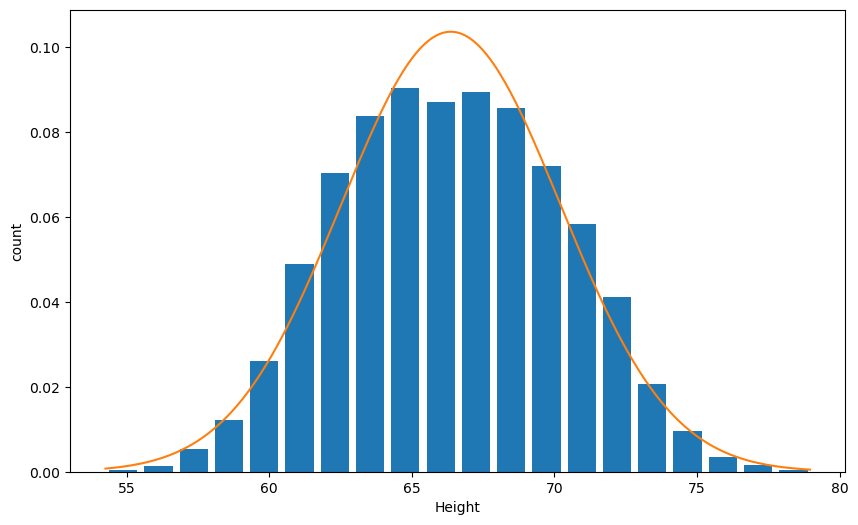

In [14]:
from scipy.stats import norm

plt.hist(df.height,bins=20,rwidth=0.8,density=True)
plt.xlabel("Height")
plt.ylabel("count")

rng=np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

plt.show()


In [18]:
upper_limit= df.height.mean()+ 3*df.height.std()
upper_limit

77.91014411725271

In [17]:
lower_limit= df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

In [19]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [20]:
df1=df[(df.height<upper_limit) & (df.height>lower_limit)]

In [21]:
df1.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [22]:
df1.shape

(9993, 2)

In [23]:
df.shape

(10000, 2)

In [24]:
df.shape[0]-df1.shape[0]

7


## using z-score



In [35]:
df['z-score']=(df.height - df.height.mean()) / df.height.std()

In [36]:
df.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [45]:
df[df["z-score"]>3]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [49]:
 df[df["z-score"]<-3]

,gender,height,z-score
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


## OR

In [53]:
df[(df["z-score"]>3)  | (df["z-score"]<-3)]

,gender,height,z-score
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [54]:
df1=df[(df["z-score"]>-3) & (df["z-score"]<3)]

In [55]:
df1.head()

,gender,height,z-score
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [56]:
df1.shape

(9993, 3)